In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sklearn

In [3]:
conda install scikit-learn


Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https://repo.anaconda.com/pkgs/main/win-64'




In [7]:
import joblib
from skimage.feature import hog
from sklearn.svm import LinearSVC
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import metrics
from sklearn import model_selection
from sklearn import svm
#from sklearn import data,exposure

In [8]:
#chargement de dataset
mnist = loadmat("mnist-original.mat")
features = mnist["data"].T#il faur convertir l'ordre de data pour que les lignes representent les images et les colonnes representent les pixels de l'image
labels = mnist["label"][0]
features.shape

(70000, 784)

[0]
[5923]
[12665]
[18623]
[24754]
[30596]
[36017]
[41935]
[48200]
[54051]


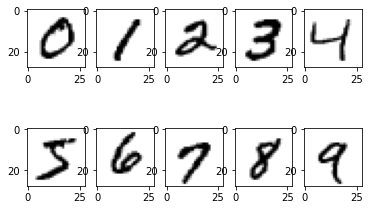

In [9]:
#la visualisation des donneés
fig,ax = plt.subplots(2,5)
ax = ax.flatten()
for i in range(10):
    label_index = np.argwhere(labels == i)[0]
    print(label_index)
    image = np.reshape(features[label_index], (28,28))
    ax[i].imshow(image, cmap='gray_r')

In [10]:
(traindata, testdata, trainlabels, testlabeles)= train_test_split(np.array(features), labels, test_size=0.25)
print(traindata.shape)
print(trainlabels.shape)
print(testdata.shape)
print(testlabeles.shape)
print("count of digits in dataset",Counter(trainlabels))

(52500, 784)
(52500,)
(17500, 784)
(17500,)
count of digits in dataset Counter({1.0: 5925, 7.0: 5505, 3.0: 5281, 2.0: 5248, 9.0: 5248, 0.0: 5203, 6.0: 5184, 4.0: 5110, 8.0: 5083, 5.0: 4713})


In [11]:
#extraire les descripteurs hog pour l'ensemble de l'entrainement 
list_hog_train = []
for feature in traindata:
    fd = hog(feature.reshape((28,28)), orientations=9 , pixels_per_cell=(14,14), cells_per_block =(1,1))#l'image doit etre en niveau de gris
    list_hog_train.append(fd)
hog_features_train = np.array(list_hog_train , 'float64')
print(list_hog_train[0].shape)#mnt on n'a plus 784 feetures mais que 36,don le but de hog est de reduire le nombre de variable,36=9binsde l'hostogramme * 4block
print(list_hog_train[0])

(36,)
[0.49845786 0.49845786 0.26492924 0.25304903 0.49845786 0.14959023
 0.         0.         0.31308265 0.33249386 0.         0.4088707
 0.4088707  0.4088707  0.4088707  0.4088707  0.23141905 0.00410181
 0.34691093 0.         0.16391678 0.2563692  0.42852154 0.42852154
 0.42852154 0.37965193 0.30336645 0.36602366 0.36602366 0.36602366
 0.27294879 0.36602366 0.12678705 0.32493705 0.36602366 0.36602366]


In [12]:
#creation d'un SVm avec un noyau gaussian avec gamma=0.01
claasifier = svm.SVC(kernel='rbf', gamma=0.01)
#entainement de modele avec les caracteristiques hog
claasifier.fit(hog_features_train,trainlabels)

SVC(gamma=0.01)

In [13]:
#apres l'entrainement de modele ,il faut extraire le hog pour les donnes test,pour offrir au modéle les donnes de meme types lors de l'entrainement de modele
list_hog_test = []
for feature in testdata:
    fd = hog(feature.reshape((28,28)), orientations=9 , pixels_per_cell=(14,14), cells_per_block =(1,1))#l'image doit etre en niveau de gris
    list_hog_test.append(fd)
hog_features_test = np.array(list_hog_test , 'float64')
print(list_hog_test[0].shape)#mnt on n'a plus 784 feetures mais que 36,don le but de hog est de reduire le nombre de variable,36=9binsde l'hostogramme * 4block
print(list_hog_test[0])

(36,)
[0.49877718 0.         0.11997832 0.         0.12973235 0.13279012
 0.45255438 0.49877718 0.49877718 0.55368513 0.11457683 0.
 0.         0.19523266 0.10067924 0.13754405 0.55368513 0.55368513
 0.404009   0.         0.00076615 0.14373507 0.404009   0.404009
 0.404009   0.404009   0.404009   0.4537776  0.10799192 0.12213016
 0.11298209 0.4537776  0.4537776  0.00123242 0.37013383 0.4537776 ]


In [14]:
score = claasifier.score(hog_features_test,testlabeles)
print("accuracy=%.f%%"%(score*100))

accuracy=85%


In [15]:
#mnr on vas entrainer le modele modele avec une valeur de c et gamma plus optimaux
#evaluation de 6 valeurs aleatoire dans un echelle logaritmique entre -2 et 3
c_range = np.logspace(-2, 3, 6)

#evaluation de 6 valeurs aleatoire dans un echelle logaritmique entre -2 et 3
gamma_range = np.logspace(-2, 1, 4)

#parameter grid
param_grid = {'C':c_range, 'gamma': gamma_range}

#critere de l'evaluation de modele 
score ='accuracy'

#grid searsh
grid = model_selection.GridSearchCV(svm.SVC(kernel='rbf'),param_grid, cv=5, scoring=score) #5 folds of cross validation

#faire tourner la recherche sur la grille
grid.fit(hog_features_train,trainlabels)

#afficher les paramettres optimaux
print("les paramettres optimaux sont :{0} avec score de :{1}".format(grid.best_params_,grid.best_score_))


les paramettres optimaux sont :{'C': 10.0, 'gamma': 1.0} avec score de :0.9092571428571429


In [ ]:
# predire le traintest mais avec le modele optimisé
core = grid.score(hog_features_test,testlabeles)

In [23]:
print("accuracy=%.f %%" % (core*100))

accuracy=91 %


In [19]:
#sauvergade de modele sans passer a chaque fois par l'entrainement
joblib.dump(grid,'svm_gigits.pkl', compress= 3)

['svm_gigits.pkl']